# Семинар. Логистическая регрессия

В этом семинаре мы создадим свой класс логистической регрессии, который обучим с помощью градиентного спуска.

## Логистическая регрессия
Логистическая регрессия --- это линейный алгоритм классификации на два класса ${+1, -1}$, основанный на подборе весов модели для оптимизации логистической функции потерь:

$$L(w) = \frac{1}{\ell}\sum\limits_{i=1}^{\ell} \ln\left(1 + \mathrm{exp}(-y^i \cdot \langle x^i, w\rangle) \right) \rightarrow\min_w,$$
где
* $x^i = (1, x^i_1, \ldots, x^i_n)$ --- вектор признаков $i$-ого объекта (нулевой признак отвечает за свободный член в скалярном произведении $\langle x^i, w\rangle$);
* $y^i \in \{+1, -1\}$ --- метка (истинного) класса $i$-ого объекта;
* $w = (w_0, w_1, \ldots, w_n)$ --- вектор весов ($w_0$ играет роль свободного члена).

С помощью функции сигмоиды:
$$\sigma(t) = \frac{1}{1 + e^{-t}}$$ можно вычислять вероятность принадлежности объекта классу $+1$ против класса $-1$ по формуле $$p(\text{класс +1}) = \sigma(\langle x, w \rangle).$$

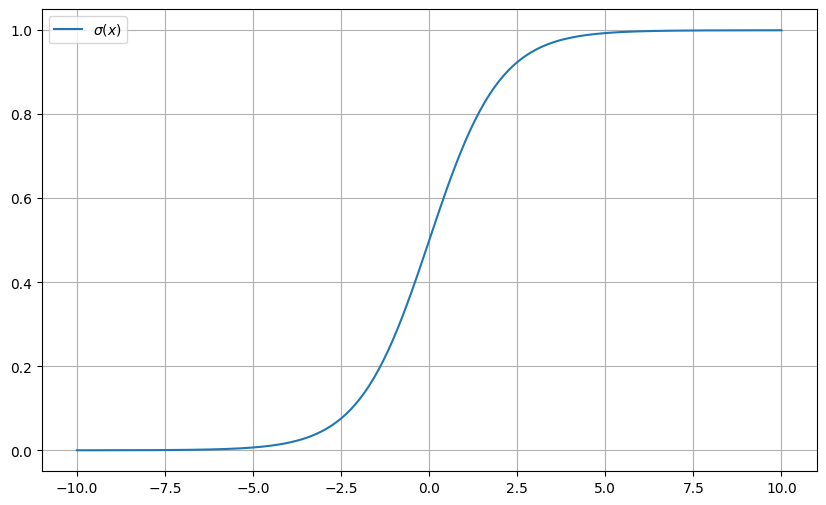

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

grid = np.linspace(-10, 10, 300)

plt.figure(figsize=(10,6))
plt.plot(grid, 1. / (1 + np.exp(-grid)), label='$\sigma(x)$')
plt.legend()
plt.grid(True)
plt.show()

Процесс подбора логистической регрессии состоит в градиентном спуске производится (стохастическим) градиентным спуском.

Градиент функции потерь:
$$\nabla_w L = -\frac{1}{\ell}\sum\limits_{i=1}^{\ell}y^i\cdot\left(1 - \frac{1}{1 + \mathrm{exp}(-y^i \cdot \langle w, x^i \rangle)}\right) \cdot x^i = -\frac{1}{\ell}\sum\limits_{i=1}^{\ell}y^i\cdot\left(1 - \sigma(y^i \cdot \langle w, x^i \rangle)\right) \cdot x^i.$$

Шаг градиентного спуска:
$$w := w - \alpha \nabla_w L.$$



## Свой класс логистической регрессии
Реализуйте методы класса логистической регрессии. Произведите обучение градиентным спуском по всей выборке с фиксированным градиентным спуском.

In [ ]:
class MyLogisticRegression(object):
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None


    def sigmoid(self, t):
        return 1. / (1 + np.exp(-t))


    def grad(self, X, y, logits):
        coef = y * (1 - self.sigmoid(y * logits))  # [ell]
        grads = -X * coef.reshape(-1, 1)  # [ell, n]
        grad = grads.mean(axis=0)  #[n]

        return grad


    def fit(self, X, y, max_iter=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}
        # Не забудьте про фиктивный признак, равный 1!
        X = np.array(X)
        y = np.array(y)
        y = 2 * y - 1

        # Добавляем признак из единиц
        X = np.hstack([np.ones([X.shape[0], 1]), X])  # [ell, n]

        l, n = X.shape
        # Инициализируем веса
        weights = np.random.randn(n)

        losses = []

        for iter_num in range(max_iter):
            # calculate grad
            logits = (X @ weights.reshape(n, 1)).ravel()  # [ell]
            grad = self.grad(X, y, logits)
            # update weights
            weights -= grad * lr

            # calculate loss
            loss = np.mean(np.log(1 + np.exp(-y * logits)))
            losses.append(loss)

        # assign coef, intersept
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]

        return losses


    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        X = np.array(X)
        X = np.hstack([np.ones([X.shape[0], 1]), X])  # [ell, n]
        weights = np.concatenate([self.intercept_.reshape([1]), self.coef_])
        logits = (X @ weights.reshape(-1, 1))  # [ell, 1]

        return self.sigmoid(logits)


    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

## Создание датасета

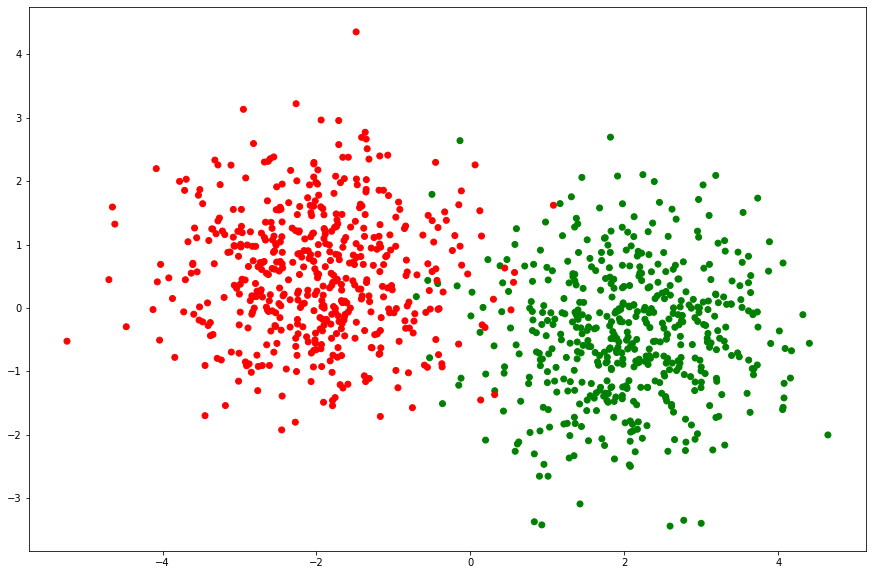

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [ ]:
clf = MyLogisticRegression()

losses = clf.fit(X, y, max_iter=1000)

coef, intercept = clf.coef_, clf.intercept_

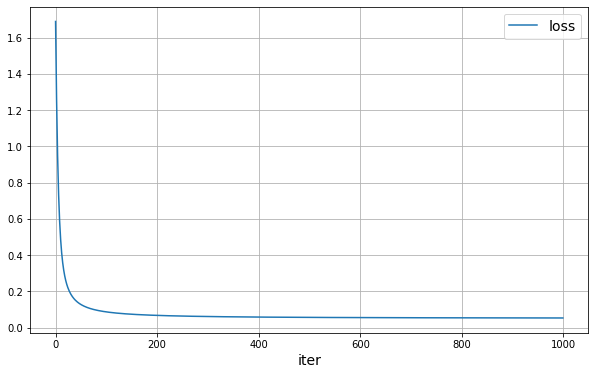

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(losses, label='loss')
plt.legend(fontsize=14)
plt.xlabel('iter', fontsize=14)
plt.grid()

In [ ]:
coef, intercept

(array([ 3.05927282, -0.63638939]), -0.10885697405603849)

## Визуализация результатов

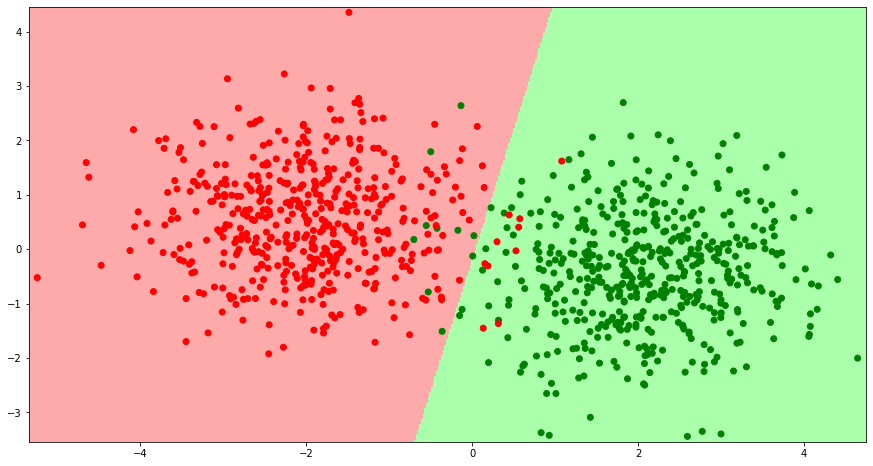

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 500))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

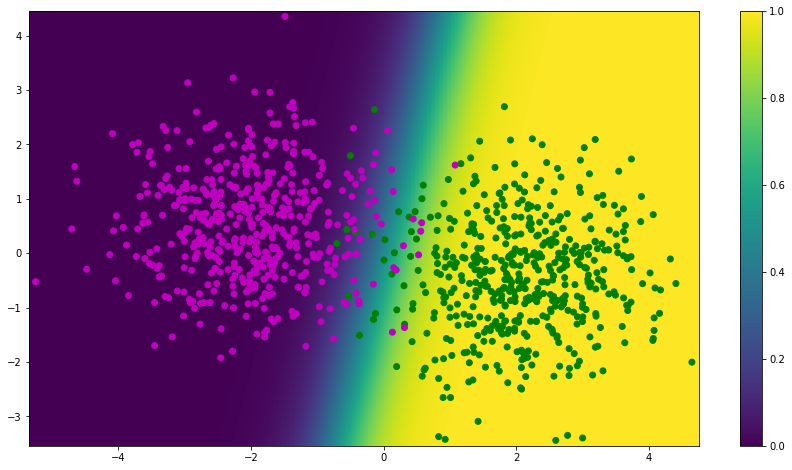

In [ ]:
colors = ("magenta", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])


plt.figure(figsize=(15,8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y, clf.predict_proba(X))

0.998372